In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### EDA

In [2]:
ames = pd.read_csv('/Users/jenelleverrochi/Desktop/DSI/Train Data - Project 3.txt')
ames_test = pd.read_csv('/Users/jenelleverrochi/Desktop/DSI/Test Data - Project 3.txt')

In [3]:
print(ames.shape)
print(ames_test.shape)

(2051, 82)
(879, 80)


In [4]:
ames.isnull().sum()[ames.isnull().sum() > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [5]:
ames.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

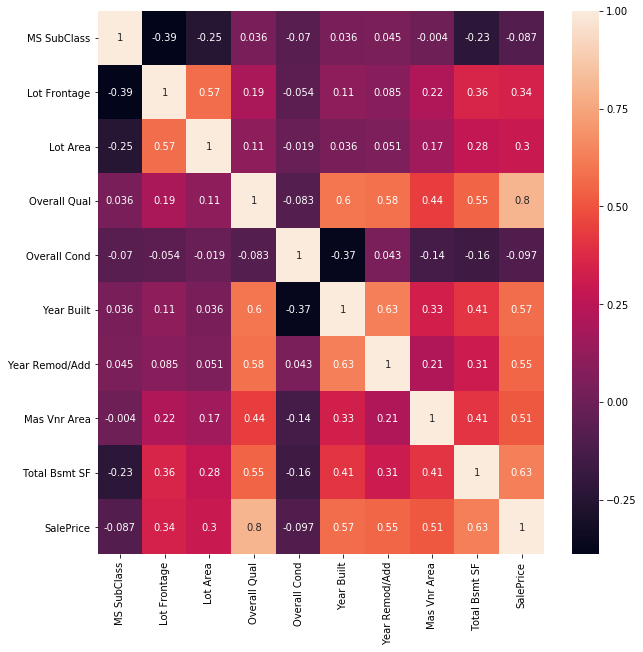

In [6]:
plt.figure(figsize=(10,10))
test_df = ames[['MS SubClass', 'MS Zoning', 'Lot Frontage', 
                    'Lot Area', 'Overall Qual', 'Overall Cond',
                'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF',  'SalePrice']]

sns.heatmap(test_df.corr(), annot=True)

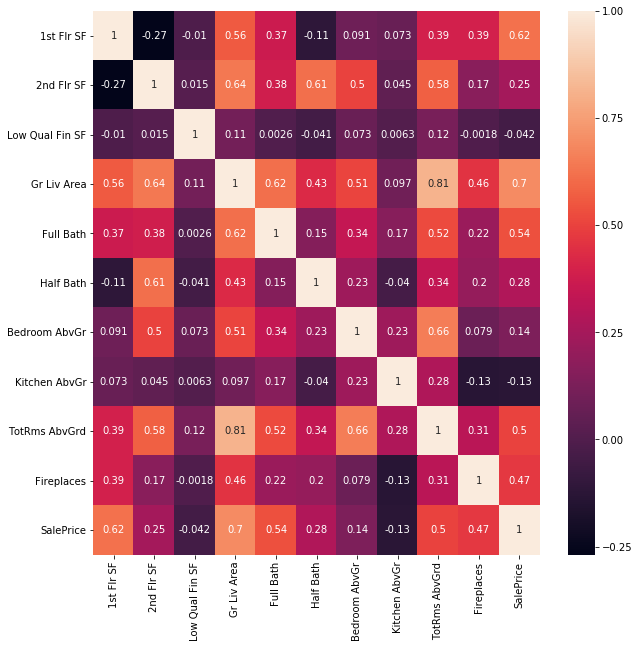

In [7]:
plt.figure(figsize=(10,10))
test_df2 = ames[['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 
                    'Gr Liv Area', 'Full Bath', 'Half Bath',
                'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',  'SalePrice']]

sns.heatmap(test_df2.corr(), annot=True)

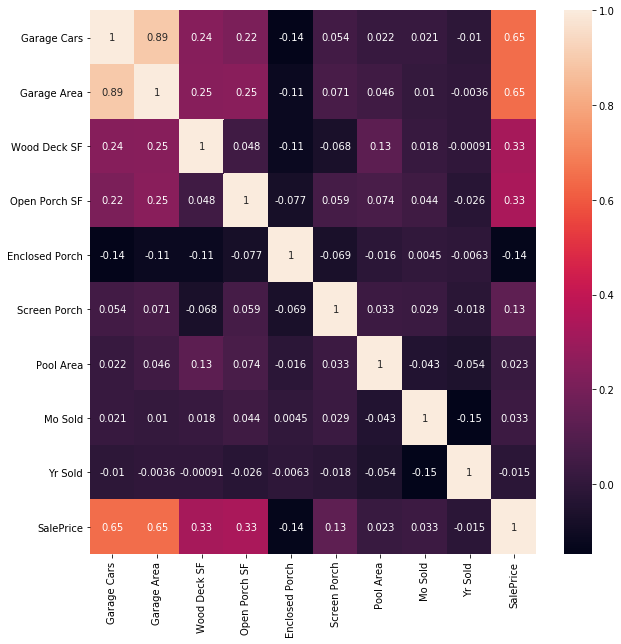

In [8]:
plt.figure(figsize=(10,10))
test_df3 = ames[['Garage Cars', 'Garage Area', 'Wood Deck SF', 
                    'Open Porch SF', 'Enclosed Porch', 'Screen Porch',
                'Pool Area', 'Mo Sold', 'Yr Sold', 'SalePrice']]

sns.heatmap(test_df3.corr(), annot=True)

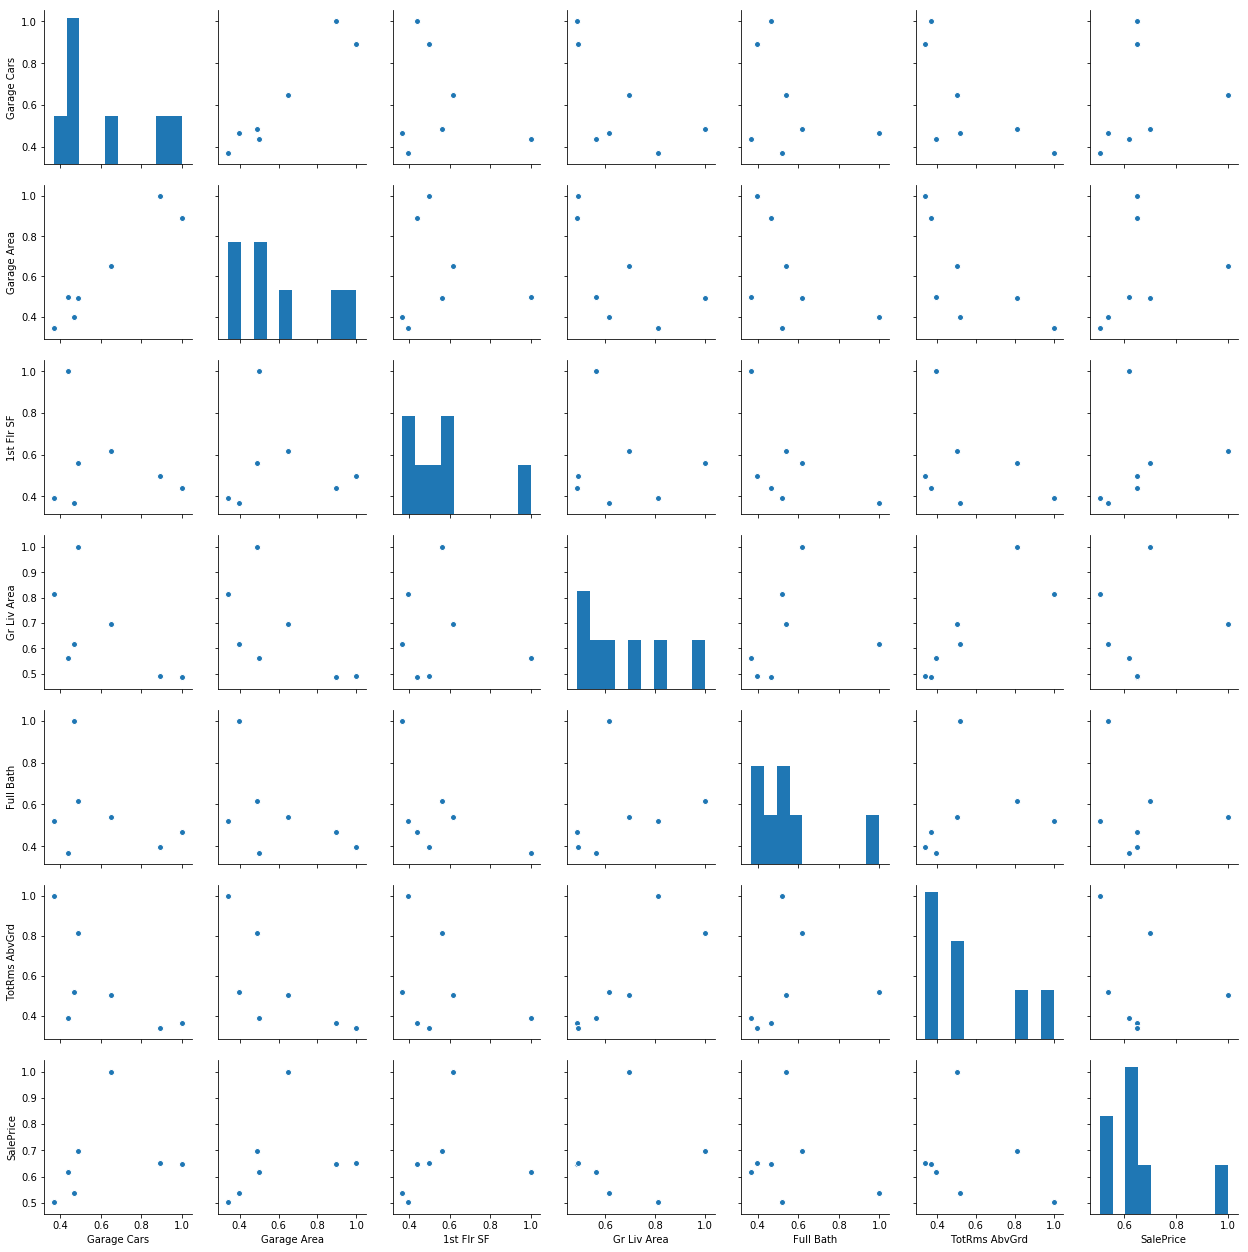

In [9]:
sns.pairplot(ames[['Garage Cars', 'Garage Area', '1st Flr SF', 'Gr Liv Area', 
                   'Full Bath', 'TotRms AbvGrd', 'SalePrice']].corr())

In [10]:
abs(ames.corr()['SalePrice']).sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
PID                0.255052
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Enclosed Porch     0.135656
Screen Porch       0.134581
Kitchen AbvGr      0.125444
Overall Cond       0.097019
MS SubClass        0.087335
Id                 0.051398
3Ssn Porch         0.048732
Bsmt Half Bath     0.045328
Low Qual Fin SF    0.041594
Mo Sold            0.032735
Pool Area          0

In [11]:
#From EDA I was able to conclude that the following variables all have more than
#a .5 R2 so are most correlated to sale price:

#1st Flr SF, Gr Liv Area, Full Bath, TotRms AbvGrd, Fireplaces, Garage Cars, Garage Area,
#Overall Qual, Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF



### PREPROCESSING

Seperate numeric and categorical data

In [12]:
g = ames.columns.to_series().groupby(ames.dtypes).groups
d = {k.name: v for k, v in g.items()}
d

{'float64': Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
       dtype='object'),
 'int64': Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
        'SalePrice'],
       dtype='object'),
 'object': Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2n

In [13]:
ames_num = ames[['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold' ]]

ames_cat = ames[['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
        'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
        'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
        'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
        'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
        'Sale Type', 'Sale Condition']]

In [14]:
X = ames_num[[col for col in ames_num.columns if col != 'SalePrice']]
y = ames.SalePrice

print(X.shape, y.shape)

(2051, 38) (2051,)


TTS

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1538, 38) (513, 38) (1538,) (513,)


In [16]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

Lot Frontage      258
Mas Vnr Area       17
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt      88
Garage Cars         1
Garage Area         1
dtype: int64

In [17]:
X_train.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,...,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
773,60.0,0.0,234.0,0.0,739.0,973.0,0.0,0.0,1930.0,2.0,...,0,0,0,219,0,0,0,0,4,2008
1574,63.0,106.0,0.0,0.0,1422.0,1422.0,0.0,0.0,2004.0,2.0,...,0,192,60,0,0,0,0,0,11,2007
1534,21.0,80.0,0.0,0.0,546.0,546.0,0.0,0.0,1970.0,1.0,...,0,0,0,0,0,0,0,0,1,2007
967,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,...,1,298,0,0,0,0,0,0,5,2007
1866,NaN,295.0,0.0,0.0,1519.0,1519.0,0.0,0.0,2000.0,3.0,...,1,162,153,0,0,0,0,0,6,2008


In [18]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

X_train = imputer.fit_transform(X_train)

In [19]:
X_train

array([[  6.00000000e+01,   0.00000000e+00,   2.34000000e+02, ...,
          0.00000000e+00,   4.00000000e+00,   2.00800000e+03],
       [  6.30000000e+01,   1.06000000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   1.10000000e+01,   2.00700000e+03],
       [  2.10000000e+01,   8.00000000e+01,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   2.00700000e+03],
       ..., 
       [  2.40000000e+01,   0.00000000e+00,   4.35000000e+02, ...,
          0.00000000e+00,   8.00000000e+00,   2.00900000e+03],
       [  7.80000000e+01,   7.60000000e+01,   2.40000000e+01, ...,
          0.00000000e+00,   3.00000000e+00,   2.00900000e+03],
       [  7.90000000e+01,   2.40000000e+02,   2.80000000e+01, ...,
          0.00000000e+00,   2.00000000e+00,   2.01000000e+03]])

In [20]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)

X_train

array([[ -3.93675329e-01,  -5.62365260e-01,  -4.57065153e-01, ...,
         -8.37064923e-02,  -8.15442555e-01,   1.74905283e-01],
       [ -2.47614058e-01,   6.62173199e-02,  -9.87829941e-01, ...,
         -8.37064923e-02,   1.75078210e+00,  -5.89311550e-01],
       [ -2.29247185e+00,  -8.79633129e-02,  -9.87829941e-01, ...,
         -8.37064923e-02,  -1.91525312e+00,  -5.89311550e-01],
       ..., 
       [ -2.14641058e+00,  -5.62365260e-01,  -1.15181026e-03, ...,
         -8.37064923e-02,   6.50971534e-01,   9.39122116e-01],
       [  4.82692297e-01,  -1.11683410e-01,  -9.33392527e-01, ...,
         -8.37064923e-02,  -1.18204608e+00,   9.39122116e-01],
       [  5.31379388e-01,   8.60840581e-01,  -9.24319624e-01, ...,
         -8.37064923e-02,  -1.54864960e+00,   1.70333895e+00]])

In [21]:
X_train = pd.DataFrame(X_train, columns=X.columns)


Regularization - Lasso

In [22]:

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

In [23]:
lasso = Lasso(alpha=500)
lasso.fit(X_train, y_train)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
lasso.coef_

array([  3.01920205e+03,   6.71537543e+03,   8.54055191e+03,
         0.00000000e+00,  -0.00000000e+00,   8.47321427e+03,
         1.15314314e+03,  -1.03648826e+03,   3.79111145e+03,
         7.92362226e+02,   3.69510035e+03,   0.00000000e+00,
        -2.44125087e+02,  -4.04618688e+03,   4.87408469e+03,
         2.38270280e+04,   4.01988849e+03,   6.64346504e+03,
         4.50309814e+03,   4.22251459e+02,   0.00000000e+00,
        -7.21641207e+02,   2.55714948e+04,   5.24797896e+00,
        -0.00000000e+00,  -6.02885940e+03,  -1.19483887e+03,
         3.80186076e+03,   1.97801181e+03,   1.54547445e+03,
         0.00000000e+00,   1.96671914e+01,   2.04437521e+01,
         4.28541355e+03,   1.26640374e+02,  -9.72138413e+03,
        -0.00000000e+00,  -9.90201609e+01])

In [25]:
for i, col in enumerate(X.columns):
    print(col, lasso.coef_[i])

Lot Frontage 3019.20205181
Mas Vnr Area 6715.3754321
BsmtFin SF 1 8540.55190999
BsmtFin SF 2 0.0
Bsmt Unf SF -0.0
Total Bsmt SF 8473.21427353
Bsmt Full Bath 1153.14313698
Bsmt Half Bath -1036.4882575
Garage Yr Blt 3791.11144911
Garage Cars 792.362225966
Garage Area 3695.10034966
Id 0.0
PID -244.125086562
MS SubClass -4046.18687667
Lot Area 4874.0846917
Overall Qual 23827.0280419
Overall Cond 4019.88848903
Year Built 6643.46503927
Year Remod/Add 4503.09813924
1st Flr SF 422.251458605
2nd Flr SF 0.0
Low Qual Fin SF -721.64120672
Gr Liv Area 25571.4947989
Full Bath 5.24797895657
Half Bath -0.0
Bedroom AbvGr -6028.85940337
Kitchen AbvGr -1194.83887
TotRms AbvGrd 3801.86075865
Fireplaces 1978.01181294
Wood Deck SF 1545.47444526
Open Porch SF 0.0
Enclosed Porch 19.6671913591
3Ssn Porch 20.4437520946
Screen Porch 4285.41355245
Pool Area 126.640373982
Misc Val -9721.38413428
Mo Sold -0.0
Yr Sold -99.0201609093


In [26]:
selected_x = []
for i, col in enumerate(X.columns):
    if abs(lasso.coef_[i]) > 0:
        selected_x.append(col)
        
selected_x = X_train[selected_x]

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('All features')
scores = cross_val_score(lr, X_train, y_train, cv=10)
print(scores, '\n', 'Mean: ', scores.mean())


print('Selected features')
scores = cross_val_score(lr, selected_x , y_train, cv=10)
print(scores, '\n', 'Mean: ', scores.mean())



All features
[ 0.81045184  0.85654338  0.88095944  0.85318448  0.84597498  0.83398238
  0.86911141  0.56314973  0.86769819  0.76836158] 
 Mean:  0.814941741411
Selected features
[ 0.81193535  0.85963702  0.88052295  0.85854509  0.84591318  0.83523382
  0.86898326  0.56384373  0.86796536  0.7717529 ] 
 Mean:  0.816433265918


Gridsearch

In [28]:
lasso = Lasso()
params_grid = {
    'fit_intercept': [True, False],
    'alpha': np.linspace(0.01, 100, 10),
    'normalize': [True, False],
    'precompute':[True, False]
}

In [29]:
grid_search = GridSearchCV(lasso, params_grid, verbose=2, n_jobs=-1, cv=3)

In [30]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=True .
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=True .
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=True .
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=True, total=   0.1s
[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=True, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=True, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, normalize=True, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=False, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=True 
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=False, total=   0.1s
[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=True 
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=True, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV]  alpha=0.01, fit_intercept=True, normalize=True, precompute=False, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=True, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=False, total=   0.2s
[CV] alpha=0.01, fit_intercept=True, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=0.01, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normalize=False, precompute=True 
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=False 
[CV] alpha=11.12, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=0.01, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=True, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=11.12, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV]  alpha=11.12, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=False 
[CV] alpha=11.12, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=11.12, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=22.23, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=22.23, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=22.23, fit_intercept=True, normalize=True, precompute=False, total=   0.0s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=11.12, fit_intercept=False, normalize=False, precompute=False, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=22.23, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV]  alpha=22.23, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=22.23, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=11.12, fit_intercept=False, normalize=True, precompute=False, total=   0.2s
[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=True 
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=True, total=   0.1s
[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=True, total=   0.1s
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=False, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=True, total=   0.1s
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=22.23, fit_intercept=True, normalize=False, precompute=False, total=   0.2s
[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=False 
[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=False, total=   0.2s
[CV] alpha=22.23, fit_interce

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=True, total=   0.0s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=False, total=   0.2s
[CV] alpha=22.23, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=True, total=   0.1s
[CV] alpha=22.23, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=22.23, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=22.23, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=True, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV]  alpha=33.34, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=False, normalize=True, precompute=False 
[CV] alpha=33.34, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=33.34, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=33.34, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=33.34, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=33.34, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=33.34, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=33.34, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=44.45, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=44.45, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=33.34, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV]  alpha=44.45, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=44.45, fit

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=44.45, fit_intercept=True, normalize=False, precompute=False 
[CV] alpha=44.45, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=33.34, fit_intercept=False, normalize=False, precompute=False, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=44.45, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=33.34, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=44.45, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, normalize=True, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=44.45, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV]  alpha=44.45, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=44.45, fit_intercept=True, normalize=False, precompute=False 
[CV] alpha=44.45, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=44.45, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, normalize=False, precompute=True 
[CV]  alpha=44.45, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV]  alpha=44.45, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=False 
[CV] alpha=44.45, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=44.45, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=44.45, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV]  alpha=44.45, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, normalize=False, precompute=False 
[CV] alpha=44.45, fit_intercept=False, normalize=False, precompute=True 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=44.45, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=44.45, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=44.45, fit_intercept=False, normalize=False, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, normalize=False, precompute=False 


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    1.9s


[CV]  alpha=44.45, fit_intercept=True, normalize=False, precompute=False, total=   0.1s
[CV] alpha=44.45, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=44.45, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=True 
[CV]  alpha=44.45, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=55.56, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=44.45, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV]  alpha=44.45, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV]  alpha=55.56, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=55.56, fit_intercept=True, normalize=True, precompute=False 
[CV] alpha=55.56, fit_intercept=True, normalize=False, precompute=True 
[CV] alpha=44.45, fit_intercept=False, normalize=True, precompute=False 
[CV]  alpha=55.56, fit_intercept=True, no

[CV] alpha=77.78, fit_intercept=True, normalize=True, precompute=True 
[CV]  alpha=66.67, fit_intercept=False, normalize=False, precompute=False, total=   0.0s
[CV] alpha=77.78, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=77.78, fit_intercept=True, normalize=True, precompute=True, total=   0.0s
[CV] alpha=77.78, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=66.67, fit_intercept=False, normalize=False, precompute=False, total=   0.1s
[CV] alpha=66.67, fit_intercept=False, normalize=False, precompute=False 
[CV]  alpha=77.78, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV]  alpha=66.67, fit_intercept=False, normalize=True, precompute=False, total=   0.1s
[CV] alpha=77.78, fit_intercept=True, normalize=True, precompute=False 
[CV] alpha=77.78, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=77.78, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=77.78, fit_intercept=True, no

[CV]  alpha=100.0, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV]  alpha=88.89, fit_intercept=False, normalize=True, precompute=True, total=   0.0s
[CV] alpha=100.0, fit_intercept=True, normalize=True, precompute=False 
[CV] alpha=100.0, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=100.0, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=100.0, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=100.0, fit_intercept=True, normalize=True, precompute=False, total=   0.0s
[CV] alpha=100.0, fit_intercept=True, normalize=True, precompute=False 
[CV]  alpha=100.0, fit_intercept=True, normalize=False, precompute=False, total=   0.0s
[CV] alpha=100.0, fit_intercept=True, normalize=False, precompute=False 
[CV]  alpha=100.0, fit_intercept=True, normalize=False, precompute=True, total=   0.0s
[CV] alpha=100.0, fit_intercept=True, normalize=False, precompute=True 
[CV]  alpha=100.0, fit_intercept=True, norm

[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'fit_intercept': [True, False], 'alpha': array([  1.00000e-02,   1.11200e+01,   2.22300e+01,   3.33400e+01,
         4.44500e+01,   5.55600e+01,   6.66700e+01,   7.77800e+01,
         8.88900e+01,   1.00000e+02]), 'normalize': [True, False], 'precompute': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [31]:
grid_search.best_score_ , grid_search.best_params_

(0.82378000601206636,
 {'alpha': 22.23,
  'fit_intercept': True,
  'normalize': True,
  'precompute': True})

In [32]:
best_estimator = grid_search.best_estimator_

print(best_estimator.score(X_train, y_train))

0.855464224893


Now test model using test data set

In [33]:
#Must impute and standardize X_test

In [103]:
X_test = imputer.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [104]:
ss = StandardScaler()
ss.fit(X_test)
X_test = ss.transform(X_test)

In [105]:
X_test = pd.DataFrame(X_test, columns=X.columns)

In [36]:
print('Training Score:', best_estimator.score(X_train, y_train))

print('Testing Score: ', best_estimator.score(X_test, y_test))

Training Score: 0.855464224893
Testing Score:  0.752865845176


Predicting

In [37]:
ames_test.shape

(879, 80)

In [38]:
ames_test.isnull().sum()[ames_test.isnull().sum()> 0]

Lot Frontage      160
Alley             821
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           875
Fence             707
Misc Feature      838
dtype: int64

In [39]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [40]:
g = ames_test.columns.to_series().groupby(ames.dtypes).groups
d = {k.name: v for k, v in g.items()}
d

{'float64': Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
       dtype='object'),
 'int64': Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
       dtype='object'),
 'object': Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', '

In [41]:
ames_test_num = ames_test[['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']]

In [42]:
ames_test_num.shape

(879, 38)

In [47]:
ames_test_ss.shape

(879, 38)

In [48]:
ames_test_ss = imputer.transform(ames_test_num)
ames_test_ss = pd.DataFrame(ames_test_ss)

In [49]:
ss = StandardScaler()
ss.fit(ames_test_ss)
ames_test_ss = ss.transform(ames_test_ss)

In [50]:
ames_test_num.shape

(879, 38)

In [51]:
ames_test_ss = pd.DataFrame(ames_test_ss, columns=ames_test_num.columns)

In [52]:
selected_x.columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Yr Sold'],
      dtype='object')

In [53]:
ames_test_ss[selected_x.columns].shape

(879, 31)

In [54]:
ames_test.shape

(879, 80)

In [55]:
y_hat = lr.predict(ames_test_ss)

In [56]:
y_hat.mean()

181493.91807542232

In [57]:
y_train.mean()

181493.91807542264

In [58]:
PRED = pd.DataFrame(y_hat, columns=['SalePrice'])

In [59]:
ID = ames_test[['Id']]

In [60]:
PRED.head()

,SalePrice
0,144192.437562
1,163953.045274
2,208172.898121
3,114864.374091
4,199367.741695


In [61]:
Prediction1 = pd.concat([ID, PRED], axis=1)

In [62]:
pwd

'/Users/jenelleverrochi/GA/PROJECTS/project-3'

In [63]:
Prediction1.to_csv('predictions.csv', index=False)

In [70]:
X_train.shape

(1538, 38)

In [71]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=10, verbose=2)

In [73]:
rfe.fit(X_train, y_train)

Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 fe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=2)

In [74]:
rfe.support_

array([False, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True], dtype=bool)

In [76]:
rfe_list = []
for i, col in enumerate(X):
    if rfe.support_[i] == True:
        rfe_list.append(col)

In [106]:
X_train_rfe = X_train[rfe_list]
X_test_rfe = X_test[rfe_list]

In [112]:
lr.fit(X_train_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
X_train_rfe.shape

(1538, 10)

In [114]:
lr.score(X_test_rfe, y_test)

0.71503544320904511

In [115]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
lr.score(X_test, y_test)

0.73931570622117371

In [93]:
X_test.shape

(513, 38)

In [94]:
y_test.shape

(513,)

In [198]:
selectkbest = SelectKBest(score_func=f_classif, k=20)

In [199]:
selectkbest.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_classif at 0x1a17adf620>)

In [200]:
selectkbest.get_support()

array([ True,  True,  True, False, False,  True, False, False,  True,
        True,  True, False, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
       False, False], dtype=bool)

In [201]:
X_train.iloc[:,selectkbest.get_support()].head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Garage Yr Blt,Garage Cars,Garage Area,Lot Area,Overall Qual,Year Built,Year Remod/Add,1st Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Open Porch SF,3Ssn Porch,Misc Val
0,-0.393675,-0.562365,-0.457065,-0.178264,-2.016406,0.291344,-0.370511,-0.074032,-0.788810,-1.701139,-1.152773,0.561891,-0.102719,1.730686,0.758914,2.300289,-0.927104,-0.718265,-0.111233,-0.083706
1,-0.247614,0.066217,-0.987830,0.859978,1.038019,0.291344,0.713660,-0.229707,0.630956,1.071049,0.937988,0.677691,-0.102719,-0.155147,0.758914,0.360681,-0.927104,0.190734,-0.111233,-0.083706
2,-2.292472,-0.087963,-0.987830,-1.165634,-0.365365,-1.018852,-0.868392,-1.149463,-1.498693,-0.051027,-0.677600,-1.576547,-0.102719,-0.825756,-1.062006,-0.285855,-0.927104,-0.718265,-0.111233,-0.083706
3,0.580066,-0.562365,1.230495,0.490003,-0.117709,0.291344,-0.058754,-0.074032,-0.078927,0.146987,-0.392497,0.265958,-0.102719,-0.480291,0.758914,-0.285855,0.651950,-0.718265,-0.111233,-0.083706
4,-0.052866,1.186992,-0.987830,1.084275,0.872915,1.601539,0.997499,0.124100,2.050722,0.939040,0.747918,0.963331,-0.102719,1.368963,0.758914,1.007217,0.651950,1.599683,-0.111233,-0.083706


In [216]:
selected_xs = selectkbest.transform(X_train)
print(X_train.shape, selected_xs.shape)

(1538, 38) (1538, 20)


In [217]:
print('All features')
scores = cross_val_score(lr, X_train, y_train)
print(scores, '\n', 'Mean: ', scores.mean(),'\n')

print('Feature Selection via SelectKBest')
scores = cross_val_score(lr, selected_xs, y_train)
print(scores, '\n', 'Mean: ', scores.mean())

All features
[  8.41133628e-01  -4.26849109e+20   7.69890063e-01] 
 Mean:  -1.42283036428e+20 

Feature Selection via SelectKBest
[ 0.83764512  0.83701004  0.77989393] 
 Mean:  0.818183027976


In [218]:
selected_xs_test = selectkbest.transform(X_test)
print(X_test.shape, selected_xs.shape)

(513, 38) (1538, 20)


In [220]:
print('All features')
scores = cross_val_score(lr, X_test, y_test)
print(scores, '\n', 'Mean: ', scores.mean(),'\n')

print('Feature Selection via SelectKBest')
scores = cross_val_score(lr, selected_xs_test, y_test)
print(scores, '\n', 'Mean: ', scores.mean())

All features
[ 0.29810624  0.37798614  0.72665   ] 
 Mean:  0.467580792064 

Feature Selection via SelectKBest
[ 0.24352506  0.77585803  0.80726462] 
 Mean:  0.608882570366


In [224]:
selected_xs.shape

(1538, 20)

In [225]:
lr.fit(selected_xs, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [227]:
lr.score(selected_xs_test, y_test)

0.7273766257908566

In [231]:
ames_test_ss.shape

(879, 38)

In [232]:
selected_amestest = selectkbest.transform(ames_test_ss)
print(ames_test_ss.shape, selected_amestest.shape)

(879, 38) (879, 20)


In [238]:
PRED2 = pd.DataFrame(lr.predict(selected_amestest), columns=['SalePrice'])

In [241]:
Prediction2 = pd.concat((ID, PRED2), axis=1)

In [243]:
Prediction2.to_csv('prediction_lr2', index=False)

In [333]:
en = ElasticNet(alpha=.1,l1_ratio=.9)
params_grid = {
    'fit_intercept': [True, False],
    'alpha': np.linspace(0.01, 100, 10),
    'l1_ratio': np.linspace(0.01, 0.99, 10)
}

In [334]:
en.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [336]:
en.score(X_test, y_test)

0.7430046371281076

In [340]:
PRED4 = pd.DataFrame(en.predict(ames_test_ss), columns=['SalePrice'])

In [341]:
Prediction4 = pd.concat((ID, PRED4), axis=1)

In [343]:
Prediction4.to_csv('prediction_lr4.csv', index=False)

In [248]:
grid_search = GridSearchCV(en, params_grid, verbose=2, n_jobs=-1)

In [249]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.01 ...................
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.01 ...................
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.01 ...................
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.118888888889 .........
[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.01, total=   0.1s
[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.01, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.118888888889 .........
[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.01, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.118888888889 .........
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.227777777778 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.118888888889, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.227777777778 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.118888888889, total=   0.1s
[C

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.445555555556, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.445555555556 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.336666666667, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.336666666667, total=   0.1s
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.445555555556, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333 .........
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.445555555556, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333, total=   0.1s
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222 .........
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.554444444444, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.663333333333, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111 .........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222, total=   0.1s
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111 .........
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.772222222222, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.99 ...................
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.01 ..................


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.99 ...................


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.01, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.01 ..................
[CV]  alpha=0.01, fit_intercept=True, l1_ratio=0.881111111111, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.01 ..................


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.99, total=   0.1s
[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.99, total=   0.1s
[CV] alpha=0.01, fit_intercept=True, l1_ratio=0.99 ...................
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889 ........
[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.01, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.01, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889 ........
[CV] .... alpha=0.01, fit_intercept=True, l1_ratio=0.99, total=   0.1s
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889 ........
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.227777777778 ........
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.227777777778 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889, total=   0.1s
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.227777777778, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.227777777778 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.227777777778, total=   0.1s
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.118888888889, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.336666666667 ........
[CV] alpha=0.01, fit_intercept=False, l1_r

/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.445555555556 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.336666666667, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.336666666667 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.336666666667, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.445555555556, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.445555555556 ........
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.445555555556, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.336666666667, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.445555555556, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333 ........
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333, total=   0.1s
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.554444444444, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222 ........
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222 ........
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.663333333333, total=   0.1s
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222, total=   0.1s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222 ........
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.99 ..................
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111, total=   0.2s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111 ........


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111, total=   0.1s
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.99 ..................
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.772222222222, total=   0.1s
[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.99, total=   0.1s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.01 ..................
[CV] alpha=0.01, fit_intercept=False, l1_ratio=0.99 ..................


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ... alpha=11.12, fit_intercept=True, l1_ratio=0.01, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.01 ..................
[CV]  alpha=0.01, fit_intercept=False, l1_ratio=0.881111111111, total=   0.1s
[CV] ... alpha=11.12, fit_intercept=True, l1_ratio=0.01, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.01 ..................
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889 ........
[CV] ... alpha=11.12, fit_intercept=True, l1_ratio=0.01, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s


/Users/jenelleverrochi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.99, total=   0.2s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV] ... alpha=0.01, fit_intercept=False, l1_ratio=0.99, total=   0.2s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.9s


[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.663333333333, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.663333333333, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.772222222222 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.554444444444, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.772222222222 ........
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.881111111111 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.772222222222, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.772222222222 ........
[CV] alpha=11.12, fit_intercept=True, l1_ratio=0.881111111111 ........
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.554444444444, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.881111111111, total=   0.0s
[CV]  alpha=11.12, fit_intercept=True, l1_ratio=0.881111111111, total=   0.0s
[CV] alpha=11.12, fit

[CV] alpha=22.23, fit_intercept=False, l1_ratio=0.772222222222 .......
[CV] alpha=22.23, fit_intercept=True, l1_ratio=0.881111111111 ........
[CV] alpha=22.23, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV]  alpha=22.23, fit_intercept=False, l1_ratio=0.227777777778, total=   0.0s
[CV]  alpha=22.23, fit_intercept=True, l1_ratio=0.881111111111, total=   0.0s
[CV]  alpha=22.23, fit_intercept=False, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, l1_ratio=0.772222222222 .......
[CV]  alpha=22.23, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV]  alpha=22.23, fit_intercept=True, l1_ratio=0.881111111111, total=   0.0s
[CV] alpha=22.23, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV] alpha=22.23, fit_intercept=True, l1_ratio=0.99 ..................
[CV]  alpha=22.23, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=22.23, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV]  alpha=22.23, fit_intercept

[CV] alpha=33.34, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV]  alpha=33.34, fit_intercept=True, l1_ratio=0.227777777778, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, l1_ratio=0.663333333333 .......
[CV] alpha=33.34, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV]  alpha=33.34, fit_intercept=False, l1_ratio=0.118888888889, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, l1_ratio=0.118888888889 .......
[CV]  alpha=33.34, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV]  alpha=33.34, fit_intercept=True, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=33.34, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV] alpha=33.34, fit_intercept=True, l1_ratio=0.772222222222 ........
[CV]  alpha=33.34, fit_intercept=False, l1_ratio=0.663333333333, total=   0.0s
[CV] alpha=33.34, fit_intercept=False, l1_ratio=0.663333333333 .......
[CV]  alpha=33.34, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=33.34, fit_intercept=T

[CV] alpha=44.45, fit_intercept=False, l1_ratio=0.01 .................
[CV]  alpha=33.34, fit_intercept=False, l1_ratio=0.118888888889, total=   0.0s
[CV]  alpha=44.45, fit_intercept=True, l1_ratio=0.554444444444, total=   0.0s
[CV] alpha=44.45, fit_intercept=True, l1_ratio=0.554444444444 ........
[CV] alpha=44.45, fit_intercept=False, l1_ratio=0.445555555556 .......
[CV] .. alpha=44.45, fit_intercept=False, l1_ratio=0.01, total=   0.0s
[CV]  alpha=44.45, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s
[CV]  alpha=44.45, fit_intercept=True, l1_ratio=0.554444444444, total=   0.0s
[CV] alpha=44.45, fit_intercept=False, l1_ratio=0.01 .................
[CV] alpha=44.45, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV] alpha=44.45, fit_intercept=True, l1_ratio=0.663333333333 ........
[CV]  alpha=44.45, fit_intercept=False, l1_ratio=0.445555555556, total=   0.0s
[CV]  alpha=44.45, fit_intercept=True, l1_ratio=0.663333333333, total=   0.0s
[CV] alpha=44.45, fit_intercept=T

[CV] .. alpha=44.45, fit_intercept=False, l1_ratio=0.99, total=   0.0s
[CV] alpha=55.56, fit_intercept=True, l1_ratio=0.01 ..................
[CV] alpha=55.56, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV]  alpha=55.56, fit_intercept=True, l1_ratio=0.881111111111, total=   0.0s
[CV]  alpha=55.56, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=55.56, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV] ... alpha=55.56, fit_intercept=True, l1_ratio=0.01, total=   0.0s
[CV]  alpha=55.56, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=55.56, fit_intercept=True, l1_ratio=0.01 ..................
[CV] alpha=55.56, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV]  alpha=55.56, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] ... alpha=55.56, fit_intercept=True, l1_ratio=0.99, total=   0.0s
[CV] alpha=55.56, fit_intercept=True, l1_ratio=0.99 ..................
[CV] alpha=55.56, fit_intercept=False, l1_ratio=

[CV] alpha=55.56, fit_intercept=False, l1_ratio=0.99 .................
[CV]  alpha=55.56, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] .. alpha=55.56, fit_intercept=False, l1_ratio=0.99, total=   0.0s
[CV] alpha=55.56, fit_intercept=False, l1_ratio=0.99 .................
[CV] alpha=66.67, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV] .. alpha=55.56, fit_intercept=False, l1_ratio=0.99, total=   0.0s
[CV] alpha=55.56, fit_intercept=False, l1_ratio=0.99 .................
[CV] .. alpha=55.56, fit_intercept=False, l1_ratio=0.99, total=   0.0s
[CV] alpha=66.67, fit_intercept=True, l1_ratio=0.01 ..................
[CV] alpha=66.67, fit_intercept=False, l1_ratio=0.227777777778 .......
[CV] alpha=66.67, fit_intercept=True, l1_ratio=0.772222222222 ........
[CV] ... alpha=66.67, fit_intercept=True, l1_ratio=0.01, total=   0.0s
[CV] alpha=66.67, fit_intercept=True, l1_ratio=0.01 ..................
[CV]  alpha=66.67, fit_intercept=True, l1_ratio=0.772222222222, total

[CV] alpha=66.67, fit_intercept=False, l1_ratio=0.772222222222 .......
[CV] alpha=66.67, fit_intercept=False, l1_ratio=0.663333333333 .......
[CV]  alpha=66.67, fit_intercept=False, l1_ratio=0.663333333333, total=   0.0s
[CV] alpha=77.78, fit_intercept=True, l1_ratio=0.663333333333 ........
[CV]  alpha=66.67, fit_intercept=False, l1_ratio=0.118888888889, total=   0.0s
[CV] alpha=77.78, fit_intercept=False, l1_ratio=0.01 .................
[CV]  alpha=66.67, fit_intercept=False, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=66.67, fit_intercept=False, l1_ratio=0.772222222222 .......
[CV]  alpha=77.78, fit_intercept=True, l1_ratio=0.118888888889, total=   0.0s
[CV] .. alpha=77.78, fit_intercept=False, l1_ratio=0.01, total=   0.0s
[CV] alpha=77.78, fit_intercept=False, l1_ratio=0.118888888889 .......
[CV] alpha=77.78, fit_intercept=True, l1_ratio=0.227777777778 ........
[CV]  alpha=77.78, fit_intercept=True, l1_ratio=0.663333333333, total=   0.0s
[CV]  alpha=66.67, fit_intercept=False,

[CV] .. alpha=77.78, fit_intercept=False, l1_ratio=0.01, total=   0.0s
[CV] alpha=77.78, fit_intercept=False, l1_ratio=0.01 .................
[CV] alpha=88.89, fit_intercept=True, l1_ratio=0.445555555556 ........
[CV]  alpha=77.78, fit_intercept=False, l1_ratio=0.663333333333, total=   0.0s
[CV] alpha=77.78, fit_intercept=False, l1_ratio=0.663333333333 .......
[CV]  alpha=88.89, fit_intercept=True, l1_ratio=0.445555555556, total=   0.0s
[CV] ... alpha=88.89, fit_intercept=True, l1_ratio=0.01, total=   0.0s
[CV] alpha=88.89, fit_intercept=True, l1_ratio=0.554444444444 ........
[CV] alpha=88.89, fit_intercept=True, l1_ratio=0.01 ..................
[CV] .. alpha=77.78, fit_intercept=False, l1_ratio=0.01, total=   0.0s
[CV] alpha=88.89, fit_intercept=True, l1_ratio=0.99 ..................
[CV]  alpha=88.89, fit_intercept=True, l1_ratio=0.554444444444, total=   0.0s
[CV] alpha=88.89, fit_intercept=True, l1_ratio=0.554444444444 ........
[CV]  alpha=77.78, fit_intercept=False, l1_ratio=0.6633

[CV]  alpha=88.89, fit_intercept=False, l1_ratio=0.445555555556, total=   0.0s
[CV] alpha=88.89, fit_intercept=False, l1_ratio=0.554444444444 .......
[CV] ... alpha=88.89, fit_intercept=True, l1_ratio=0.99, total=   0.0s
[CV] alpha=100.0, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV]  alpha=88.89, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=88.89, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV]  alpha=88.89, fit_intercept=False, l1_ratio=0.881111111111, total=   0.0s
[CV] alpha=88.89, fit_intercept=False, l1_ratio=0.99 .................
[CV]  alpha=88.89, fit_intercept=False, l1_ratio=0.554444444444, total=   0.0s
[CV] alpha=88.89, fit_intercept=False, l1_ratio=0.554444444444 .......
[CV]  alpha=100.0, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV]  alpha=88.89, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=100.0, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV] alpha=100.0, fit_intercep

[CV] alpha=100.0, fit_intercept=True, l1_ratio=0.336666666667 ........
[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV]  alpha=100.0, fit_intercept=True, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.336666666667 .......
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.772222222222 .......
[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.227777777778, total=   0.0s
[CV]  alpha=100.0, fit_intercept=True, l1_ratio=0.336666666667, total=   0.0s
[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.772222222222 .......
[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.336666666667, total=   0.0s
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.445555555556 .......
[CV]  alpha=100.0, fit_intercept=False, l1_ratio=0.772222222222, total=   0.0s
[CV] alpha=100.0, fit_intercept=False, l1_ratio=0.881111111111 .......
[CV]  alpha=100.0, fit_

[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    5.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'fit_intercept': [True, False], 'alpha': array([  1.00000e-02,   1.11200e+01,   2.22300e+01,   3.33400e+01,
         4.44500e+01,   5.55600e+01,   6.66700e+01,   7.77800e+01,
         8.88900e+01,   1.00000e+02]), 'l1_ratio': array([ 0.01   ,  0.11889,  0.22778,  0.33667,  0.44556,  0.55444,
        0.66333,  0.77222,  0.88111,  0.99   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [250]:
print(grid_search.best_score_, grid_search.best_params_)

0.825123255976 {'alpha': 11.119999999999999, 'fit_intercept': True, 'l1_ratio': 0.98999999999999999}


In [258]:
best_estimator.fit(X_train, y_train)

ElasticNet(alpha=11.119999999999999, copy_X=True, fit_intercept=True,
      l1_ratio=0.98999999999999999, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [259]:
best_estimator = grid_search.best_estimator_

print(best_estimator.score(X_train, y_train))
print(best_estimator.score(X_test, y_test))

0.855418262581
0.755288407493


In [273]:
PRED3 = best_estimator.predict(ames_test_ss)

In [274]:
PRED3 = pd.DataFrame(PRED3, columns=['SalePrice'])

In [275]:
PRED3.head()

,SalePrice
0,134726.789529
1,167565.399235
2,208285.708375
3,115166.589655
4,205380.234829


In [276]:
Prediction3= pd.concat((ID, PRED3), axis=1)

In [277]:
Prediction3.head()

,Id,SalePrice
0,2658,134726.789529
1,2718,167565.399235
2,2414,208285.708375
3,1989,115166.589655
4,625,205380.234829


In [278]:
Prediction3.to_csv('prediction_lr3.csv', index=False)

In [345]:
from sklearn.linear_model import Ridge

In [400]:
params = {
    'fit_intercept': [True, False],
    'alpha': np.linspace(100, 1000, 10),
    'normalize': [True, False]
}

In [401]:
np.linspace(100, 1000, 10)

array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
         900.,  1000.])

In [402]:
ridge = Ridge()
grid_search = GridSearchCV(ridge, params, verbose=1)

In [403]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'alpha': array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
         900.,  1000.]), 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [394]:
print(grid_search.best_score_, grid_search.best_params_)

0.825153403341 {'alpha': 100.0, 'fit_intercept': True, 'normalize': False}


In [404]:
best_estimator = grid_search.best_estimator_

print(best_estimator.score(X_train, y_train))
print(best_estimator.score(X_test, y_test))

0.856958809256
0.750696701478


In [405]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'alpha': array([  100.,   200.,   300.,   400.,   500.,   600.,   700.,   800.,
         900.,  1000.]), 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [398]:
grid_search.score(X_test, y_test)

0.75069670147795364

In [413]:
PRED6 = pd.DataFrame(grid_search.predict(ames_test_ss), columns=['SalePrice'])

In [414]:
Prediction6 = pd.concat((ID, PRED6), axis=1)

In [415]:
Prediction6.to_csv('prediction_lr6.csv', index=False)

In [420]:
PRED7= pd.DataFrame(best_estimator.predict(ames_test_ss), columns=['SalePrice'])

In [421]:
Predictions7 = pd.concat((ID, PRED7), axis=1)

In [422]:
Predictions7.head()

,Id,SalePrice
0,2658,136550.243651
1,2718,164818.629552
2,2414,208347.923460
3,1989,114003.291715
4,625,203793.547567


In [423]:
Predictions7.to_csv('prediction_lr7.csv', index=False)

In [375]:
ridge.fit(X_train, y_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [376]:
ridge.score(X_train, y_train)

0.83324017225760005

In [377]:
ridge.score(X_test, y_test)

0.76788573643303315

In [367]:
PRED5 = pd.DataFrame(ridge.predict(ames_test_ss), columns=['SalePrice'])

In [368]:
Prediction5 = pd.concat((ID, PRED5), axis=1)

In [369]:
Prediction5.to_csv('predictions_lr5.csv', index=False)